## MNIST convolutional neural network

Adapted from [Tensorflows](https://www.tensorflow.org/tutorials/layers) own tutorial on CNNs.

In [1]:
import os, math, time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnist_helper import read_data_sets
from tfhelper import tf_show_graph

In [2]:
start_time = time.time()
mnist_path = 'C:/src/tf-playground/mnist'
tf_logs = 'C:/src/tf-playground/logs'

In [3]:
with tf.name_scope('X'):
    X = tf.placeholder(tf.float32, [None, 784])
with tf.name_scope('Y_'):
    Y_ = tf.placeholder(tf.float32, [None, 10])
with tf.name_scope('reshape'):
    X_image = tf.reshape(X, [-1, 28, 28, 1])
with tf.name_scope('conv1'):
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))
    XW_conv1 = tf.nn.conv2d(X_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')
    h_conv1 = tf.nn.relu(XW_conv1 + b_conv1)
with tf.name_scope('pool1'):
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
with tf.name_scope('conv2'):
    W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
    hW_conv2 = tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')
    h_conv2 = tf.nn.relu(hW_conv2 + b_conv2)
with tf.name_scope('pool2'):
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
with tf.name_scope('fc1'):
    W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
with tf.name_scope('fc2'):
    W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
    b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [4]:
with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_, logits=y_conv))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
with tf.name_scope('correct_prediction'):
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y_, 1))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
mnist = read_data_sets(mnist_path, one_hot=True)

Extracting C:/src/tf-playground/mnist\train-images-idx3-ubyte.gz
Extracting C:/src/tf-playground/mnist\train-labels-idx1-ubyte.gz
Extracting C:/src/tf-playground/mnist\t10k-images-idx3-ubyte.gz
Extracting C:/src/tf-playground/mnist\t10k-labels-idx1-ubyte.gz


In [6]:
train_writer = tf.summary.FileWriter(tf_logs)
train_writer.add_graph(tf.get_default_graph())

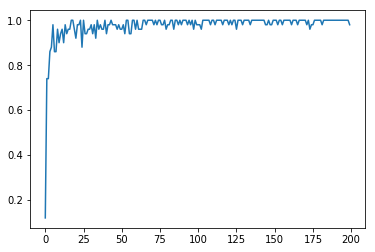

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
accuracies = []
for i in range(10000):
    batch = mnist.train.next_batch(50, shuffle=True) # 60k images total
    if i % 50 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], Y_: batch[1], keep_prob: 1.0}, session=sess)
        accuracies.append(train_accuracy)
        # print('{}%'.format((i+0.0001) / 20000))
    train_step.run(feed_dict={X: batch[0], Y_: batch[1], keep_prob: 0.5}, session=sess)

plt.plot(accuracies)

In [8]:
# todo test across entire test
test_batch = mnist.test.next_batch(5000)
test_acc = accuracy.eval(feed_dict={X: test_batch[0], Y_: test_batch[1], keep_prob: 1.0}, session=sess)
print('Time to train: {} secs'.format(time.time() - start_time))
print('Test accuracy: {}'.format(test_acc))

Time to train: 323.3241558074951 secs
Test accuracy: 0.9890000224113464


In [9]:
tf_show_graph(tf)